In [54]:
##Q1   Write a python program which searches all the product under a particular product from www.amazon.in. The
#product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
#guitars. 



import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time


In [55]:
driver=webdriver.Chrome()

In [56]:
driver.get("https://www.amazon.in/")

In [58]:
inputU = input('please enter product here--->')

please enter product here--->HEADPHONES


In [60]:
search_bar = driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')    # Finding the search bar using it's xpath
search_bar.send_keys(inputU)       # Inputing keyword to search 
search_button = driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')    # Finding the xpath of search button
search_button.click()        # Clicking the search button


In [61]:
productName=[]

In [64]:
#scraping the Product_Name 
PName=driver.find_elements(By.XPATH,"//span[@class='a-size-medium a-color-base a-text-normal']")
for i in PName:
    if i.text is None :
        productName.append("--") 
    else:
        productName.append(i.text)
print(len(productName),productName)
#23 ['DIGITEK DBH 006 Over-Ear Bluetooth 5.0 Headphone | with Extra Bass | Upto 10 Hrs. Playtime | Dual Pairi

24 ['HAMMER Bash Max Over The Ear Wireless Bluetooth Headphones with Mic, Touch Control, Deep Bass, Upto 18 Hours Playtime, Bluetooth 5.3, Workout/Travel (Cool Grey)', 'Cosmic Byte Over the Ear Headphone with Mic & LED - G4000 Edition (Red)', 'Sony WH-CH520, Wireless On-Ear Bluetooth Headphones with Mic, Upto 50 Hours Playtime, DSEE Upscale, Multipoint Connectivity/Dual Pairing,Voice Assistant App Support for Mobile Phones (Blue)', 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)', 'Boult Audio Z40 True Wireless in Ear Earbuds with 60H Playtime, Zen™ ENC Mic, Low Latency Gaming, Type-C Fast Charging, Made in India, 10mm Rich Bass Drivers, IPX5, Bluetooth 5.3 Ear Buds TWS (Blue)', 'ZEBRONICS Thunder Bluetooth 5.3 Wireless Headphones with 60H Backup, Gaming Mode, Dual Pairing, ENC, AUX, Micro SD, Voice Assistant, Comfortable Earcups, Call 

In [67]:
start_page = 0
end_page = 3
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        # Moving to next page
        nxt_button = driver.find_element(By.XPATH,'//li[@class="a-last"]/a')      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element(By.XPATH,'//li[@class="a-disabled a-last"]/a').text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.


NameError: name 'StaleElementReferenceException' is not defined

In [68]:
prod_dict = {}
prod_dict['Brand']=[]
prod_dict['Name']=[]
prod_dict['Rating']=[]
prod_dict['No. of ratings']=[]
prod_dict['Price']=[]
prod_dict['Return/Exchange']=[]
prod_dict['Expected Delivery']=[] 
prod_dict['Availability']=[]
prod_dict['Other Details']=[]
prod_dict['URL']=[]

In [69]:
for url in urls[:4]:
    driver.get(url)                                                        # Loading the webpage by url
    print("Scraping URL = ", url)
    #time.sleep(2)
    
    try:
        brand = driver.find_element(By.XPATH,'//a[@id="bylineInfo"]')      # Extracting Brand from xpath
        prod_dict['Brand'].append(brand.text)
    except NoSuchElementException:
        prod_dict['Brand'].append('-')
    
    try:
        name = driver.find_element(By.XPATH,'//h1[@id="title"]/span')      # Extracting Name from xpath
        prod_dict['Name'].append(name.text)
    except NoSuchElementException:
        prod_dict['Name'].append('-')
        
    try:
        rating = driver.find_element(By.XPATH,'//span[@id="acrPopover"]')  # Extracting Ratings from xpath
        prod_dict['Rating'].append(rating.get_attribute("title"))
    except NoSuchElementException:
        prod_dict['Rating'].append('-')
    
    try:
        n_rating = driver.find_element(By.XPATH,'//a[@id="acrCustomerReviewLink"]/span')     # Extracting no. of Ratings from xpath
        prod_dict['No. of ratings'].append(n_rating.text)
    except NoSuchElementException:
        prod_dict['No. of ratings'].append('-')   
    
    try:
        price = driver.find_element(By.XPATH,'//span[@id="priceblock_ourprice"]')            # Extracting Price from xpath
        prod_dict['Price'].append(price.text)
    except NoSuchElementException:
        prod_dict['Price'].append('-')
    try:                                                                                     # Extracting Return/Exchange policy from xpath
        ret = driver.find_element(By.XPATH,'//div[@data-name="RETURNS_POLICY"]/span/div[2]/a')
        prod_dict['Return/Exchange'].append(ret.text)
    except NoSuchElementException:
        prod_dict['Return/Exchange'].append('-')
    try:
        delivry = driver.find_element(By.XPATH,'//div[@id="ddmDeliveryMessage"]/b')         # Extracting Expected Delivery from xpath
        prod_dict['Expected Delivery'].append(delivry.text)
    except NoSuchElementException:
        prod_dict['Expected Delivery'].append('-')
    
    try:
        avl = driver.find_element(By.XPATH,'//div[@id="availability"]/span')                # Extracting Availability from xpath
        prod_dict['Availability'].append(avl.text)
    except NoSuchElementException:
        prod_dict['Availability'].append('-')
    
    try:                                                                                    # Extracting Other Details from xpath
        dtls = driver.find_element(By.XPATH,'//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')
        prod_dict['Other Details'].append('  ||  '.join(dtls.text.split('\n')))
    except NoSuchElementException:
        prod_dict['Other Details'].append('-')
    
    prod_dict['URL'].append(url)                                                            # Saving url
    time.sleep(2)
        
        
        

Scraping URL =  https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3MzA2NTI2ODAxMzMyMDQ3OjE3MDgxODkyNjg6c3BfYXRmOjMwMDA3NjIxMTkzMzgzMjo6MDo6&url=%2FHAMMER-Bash-Max-Bluetooth-Headphones%2Fdp%2FB0CBG1YG5F%2Fref%3Dsr_1_1%3Fkeywords%3DHEADPHONES%26qid%3D1708189268%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1


NameError: name 'NoSuchElementException' is not defined

In [70]:
prod_df = pd.DataFrame.from_dict(prod_dict)
prod_df

ValueError: All arrays must be of the same length

In [ ]:
## unable to proceed due to above error

In [ ]:
#Q3  Write a python program to access the search bar and search button on images.google.com and scrape 10
##images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [44]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [45]:
driver=webdriver.Chrome()

In [46]:
driver.get("https://images.google.com/")

In [47]:
search_bar=driver.find_element(By.NAME,'q')
keywords=['fruits ',' cars ',' Machine learning ',' guitar ',' cakes ']


In [48]:
search_bar.clear()
search_bar .send_keys(keywords)
search_bar.send_keys(Keys.RETURN)

In [49]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'rg_i')))


<selenium.webdriver.remote.webelement.WebElement (session="1c91d1ba9972ed182ff58c1f09c49092", element="EE9A35E1C3D6DCCD5A929600A7E47C38_element_42")>

In [50]:
image_elements=driver.find_elements(By.CLASS_NAME,"rg_i")

In [51]:
image_urls = [element.get_attribute('src') for element in image_elements]


Top 10 images for '['fruits ', ' cars ', ' Machine learning ', ' guitar ', ' cakes ']':











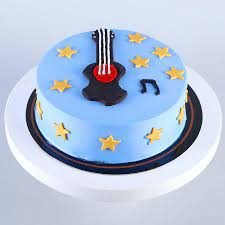
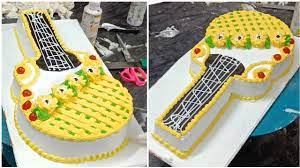
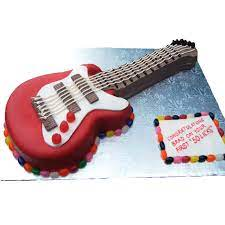
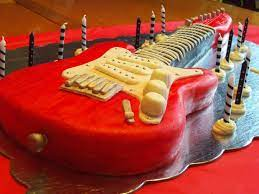
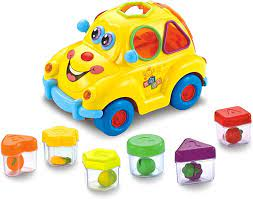
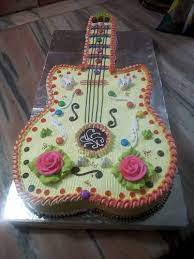
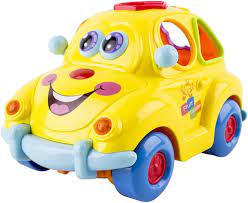
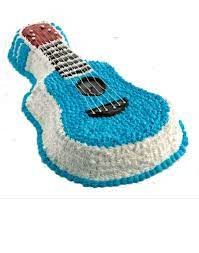
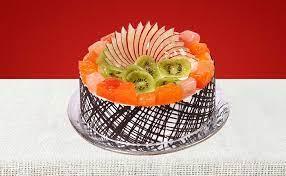
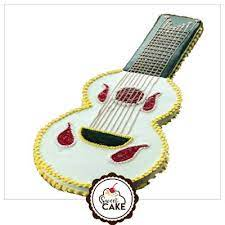

In [52]:
print(f"Top 10 images for '{keywords}':")
for url in image_urls[:10]:
    print(url)

In [ ]:
#Q4   Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
#and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
#Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
#“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
#details is missing then replace it by “- “. Save your results in a dataframe and CSV. 


In [74]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [75]:
driver=webdriver.Chrome()
driver.get("https://www.flipkart.com/")

In [76]:
search_g=driver.find_element(By.XPATH,"//input[@type='text']")
search_g

<selenium.webdriver.remote.webelement.WebElement (session="17dd73ce3230257beb19853093a96cf2", element="ADBCBD095D55537CE9F5D6910EC320F8_element_81")>

In [77]:
search_g.send_keys('smartphones')

In [78]:
search_btn=driver.find_element(By.XPATH,"//button[@class='_2iLD__']")
search_btn.click()

In [79]:
Brand_Name=[]
Colour=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]
Product_URL=[]

In [81]:
#scraping the Brand_Name 
BName=driver.find_elements(By.XPATH,"//div[@class='_4rR01T']")
for i in BName:
    if i.text is None :
        Brand_Name.append("--") 
    else:
        Brand_Name.append(i.text)
print(len(Brand_Name),Brand_Name)

24 ['Motorola G34 5G (Ocean Green, 128 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Apple iPhone 15 (Black, 128 GB)', 'Apple iPhone 15 (Pink, 128 GB)', 'vivo T2 5G (Nitro Blaze, 128 GB)', 'vivo T2 5G (Nitro Blaze, 128 GB)', 'vivo T2 5G (Velocity Wave, 128 GB)', 'vivo T2 5G (Velocity Wave, 128 GB)', 'Apple iPhone 15 (Green, 128 GB)', 'Motorola G34 5G (Ocean Green, 128 GB)', 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)', 'Motorola g54 5G (Midnight Blue, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'Motorola Edge 40 Neo (Soothing Sea, 128 GB)', 'POCO M6 5G (Orion Blue, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'Motorola g54 5G (Mint Green, 256 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'Apple iPhone 15 Plus (Black, 128 GB)', 'Motorola g54 5G (Pearl Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'Motorola G34 5G (Ice Blue, 128 GB)']


In [82]:
#scraping the Storage_RAM_ROM 
ram=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['8 GB RAM | 128 GB ROM', '128 GB ROM', '128 GB ROM', '128 GB ROM', '6 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '128 GB ROM', '4 GB RAM | 128 GB ROM', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM', '128 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM']


In [83]:
#scraping the P_F_Camera 
PC=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[3]")
for i in PC:
    if i.text is None :
        P_F_Camera.append("--") 
    else:
        P_F_Camera.append(i.text)
print(len(P_F_Camera),P_F_Camera)

24 ['50MP + 2MP | 16MP Front Camera', '48MP + 12MP | 12MP Front Camera', '48MP + 12MP | 12MP Front Camera', '48MP + 12MP | 12MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '48MP + 12MP | 12MP Front Camera', '50MP + 2MP | 16MP Front Camera', '13MP + 2MP | 5MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP Rear Camera', '50MP + 2MP | 8MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '48MP + 12MP | 12MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 16MP Front Camera']


In [85]:
#scraping the Display_size_Resolution 
DS=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['16.51 cm (6.5 inch) HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) HD+ Display', '16.51 cm (6.5 inch) HD Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.56 cm (6.52 inch) HD+ Display', '16.64 cm (6.55 inch) Full HD+ Display', '17.12 cm (6.74 inch) HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '17.02 cm (6.7 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.51 cm (6.5 inch) HD+ Display']


In [86]:
#scraping the ProcessorAndCores 
P=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[5]")
for i in P:
    if i.text is None :
        ProcessorAndCores.append("--") 
    else:
        ProcessorAndCores.append(i.text)
print(len(ProcessorAndCores),ProcessorAndCores)

24 ['Snapdragon 695 5G Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 Processor', 'Snapdragon 695 Processor', 'Snapdragon 695 Processor', 'Snapdragon 695 Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 5G Processor', 'Mediatek Helio P35 Processor', 'Dimensity 7020 Processor', 'Helio G36 Processor', 'Dimensity 7030 Processor', 'Dimensity 6100+ Processor', 'Mediatek Dimensity 6020 Processor', 'Dimensity 7020 Processor', 'Mediatek Dimensity 6020 Processor', 'Mediatek Dimensity 6020 Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Dimensity 7020 Processor', 'Mediatek Dimensity 6020 Processor', 'Mediatek Dimensity 6020 Processor', 'Snapdragon 695 5G Processor']


In [87]:
#scraping the Battery 
B=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)

24 ['5000 mAh Battery', 'A16 Bionic Chip, 6 Core Processor Processor', 'A16 Bionic Chip, 6 Core Processor Processor', 'A16 Bionic Chip, 6 Core Processor Processor', '4500 mAh Battery', '4500 mAh Battery', '4500 mAh Battery', '4500 mAh Battery', 'A16 Bionic Chip, 6 Core Processor Processor', '5000 mAh Battery', '5000 mAh Lithium-Ion Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', 'A16 Bionic Chip, 6 Core Processor Processor', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery']


In [88]:
#scraping the Price 
price=driver.find_elements(By.XPATH,"//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹11,999', '₹65,999', '₹65,999', '₹65,999', '₹15,999', '₹17,999', '₹15,999', '₹17,999', '₹65,999', '₹10,999', '₹5,999', '₹13,999', '₹5,499', '₹22,999', '₹9,499', '₹14,999', '₹15,999', '₹12,999', '₹11,999', '₹82,999', '₹13,999', '₹12,999', '₹12,999', '₹10,999']


In [89]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Amount P_F_Camera']=P_F_Camera
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['ProcessorAndCores']=ProcessorAndCores
FlipKart['Battery']=Battery
FlipKart['Price']=Price

FlipKart

,Brand_Name,Storage_RAM_ROM,Amount P_F_Camera,Display_size_Resolution,ProcessorAndCores,Battery,Price
0,"Motorola G34 5G (Ocean Green, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 695 5G Processor,5000 mAh Battery,"₹11,999"
1,"Apple iPhone 15 (Blue, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
2,"Apple iPhone 15 (Black, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
3,"Apple iPhone 15 (Pink, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
4,"vivo T2 5G (Nitro Blaze, 128 GB)",6 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹15,999"
5,"vivo T2 5G (Nitro Blaze, 128 GB)",8 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹17,999"
6,"vivo T2 5G (Velocity Wave, 128 GB)",6 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹15,999"
7,"vivo T2 5G (Velocity Wave, 128 GB)",8 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹17,999"
8,"Apple iPhone 15 (Green, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
9,"Motorola G34 5G (Ocean Green, 128 GB)",4 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 695 5G Processor,5000 mAh Battery,"₹10,999"


In [ ]:
#Q5 Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re

In [2]:
driver=webdriver.Chrome()

In [3]:
driver.get("https://www.google.co.in/maps")
time.sleep(5)

In [5]:
city=input('city name:')
search=driver.find_element(By.ID,"searchboxinput")
search.clear()
time.sleep(5)
search.send_keys(city)
button=driver.find_element(By.ID,"searchbox-searchbutton")
button.click()

try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

city name:kolkata
URL Extracted:  https://www.google.co.in/maps/place/Kolkata,+West+Bengal/@22.5353434,88.1825388,11z/data=!3m1!4b1!4m6!3m5!1s0x39f882db4908f667:0x43e330e68f6c2cbc!8m2!3d22.572646!4d88.363895!16zL20vMGN2dzk?entry=ttu
Latitude = 22.5353434, Longitude = 88.1825388


In [ ]:
#Q6 Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re

In [2]:
driver=webdriver.Chrome()
driver.get("https://www.digit.in/")

In [3]:
search_bar=driver.find_element(By.ID,"woocommerce-product-search-field-0")
search_bar

#search.send_keys('gaming laptop')




<selenium.webdriver.remote.webelement.WebElement (session="38debfba42b964bafe16139b57e3324d", element="F274DF1202E32BC2F832344690B4C92D_element_4")>

In [4]:
search_bar.send_keys('gaming laptop')


In [5]:
search_btn=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div/div/div[2]/form/button")
search_btn.click()

In [6]:
Brands=[]
Products_Description=[]
Specification=[]
Price=[]

In [7]:
br=driver.find_elements(By.XPATH,"")
len(br)
#print(br)

2

In [9]:
for i in br:
    Brands.append(str(i.text).replace("\n",""))
Brands

['', 'Dell G15 5520 Gaming Laptop', '', 'Dell G15 5520 Gaming Laptop']

In [ ]:
#Q7 Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
#“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [16]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re

In [17]:
driver=webdriver.Chrome()
driver.get("https://www.forbes.com/")

In [18]:
#search_bar=driver.find_element(By.CLASS_NAME,"icon--search")
search_bar=driver.find_element(By.CLASS_NAME,"_69hVhdY4")
search_bar.click()

In [19]:
#search_bar1=driver.find_element(By.CLASS_NAME,"search-modal__input")
#search_bar1=driver.find_element(By.XPATH,"")
search_bar1=driver.find_element(By.XPATH,'//*[name()="svg" and @class="chevron-right_svg__fs-icon chevron-right_svg__fs-icon--chevron-right"]')
search_bar1.click()
#search_bar1.send_keys('billionaires list')

In [20]:
search_bar2=driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a")
search_bar2.click()

In [21]:
rank=[]
name=[]
net_worth=[]
age=[]
citizen=[]
source=[]
industry=[]

In [22]:
#scraping rank
Rank=driver.find_elements(By.CLASS_NAME,"Table_rank___YBhk Table_dataCell__2QCve")
for i in Rank:
    rank.append(i.text)
    print(rank)

In [23]:
#scraping name

Name=driver.find_elements(By.XPATH,"/html/bdiv[1]/div[1]/div[2]/div[1]/div[1]/div[2]/div")
for j in Name[:1]:
    name.append(j.text)
    print(name[:10])

In [15]:
#Q9
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.hostelworld.com/hostels/London"
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all the hostel containers
hostels = soup.find_all("div", class_="fabresult")

# Iterate over each hostel container and extract the required information
for hostel in hostels:
  # Extract hostel name
    name = hostel.find("h2", class_="fabresult-title").text.strip()
  
  # Extract distance from city centre
    distance = hostel.find("span", class_="distance").text.strip()
  
  # Extract ratings
    ratings = hostel.find("div", class_="rating").text.strip()
  
  # Extract total reviews
    total_reviews = hostel.find("div", class_="reviews").text.strip()
  
  # Extract overall reviews
    overall_reviews = hostel.find("div", class_="overall").text.strip()
  
  # Extract privates from price
    privates_price = hostel.find("div", class_="price-col").find("div", class_="price").text.strip()
  
  # Extract dorms from price
    dorms_price = hostel.find("div", class_="price-col").find("div", class_="price").find_next_sibling("div", class_="price").text.strip()
  
  # Extract facilities
    facilities = hostel.find("div", class_="facilities").text.strip()
  
  # Extract property description
    description = hostel.find("div", class_="description").text.strip()
  
  # Print the extracted information
    print("Hostel Name:", name)
    print("Distance from City Centre:", distance)
    print("Ratings:", ratings)
    print("Total Reviews:", total_reviews)
    print("Overall Reviews:", overall_reviews)
    print("Privates from Price:", privates_price)
    print("Dorms from Price:", dorms_price)
    print("Facilities:", facilities)
    print("Property Description:", description)
    print()

In [6]:
#Q8
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re


# Set up the WebDriver
driver = webdriver.Chrome()  
# Open the YouTube video  
driver.get('https://www.youtube.com/watch?v=L-gu52eVHhk')

# Scroll to load comments
scroll_pause_time = 2  # Adjust the pause time as needed
scrolls = 10  # Adjust the number of scrolls as needed

for _ in range(scrolls):
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(scroll_pause_time)

# Extract comments, upvotes, and time
comments = driver.find_elements(By.XPATH,'//yt-formatted-string[@id="content-text"]')
upvotes = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
times = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')

# Store the extracted data
extracted_data = []
for comment, upvote, time in zip(comments, upvotes, times):
    extracted_data.append({
    'comment': comment.text,
    'upvote': upvote.text,
    'time': time.text
  })

# Close the WebDriver
driver.quit()

# Print the extracted data
for data in extracted_data:
    print(data)
    
    
    
    #######unable to perform due to this error/exception####### 

WebDriverException: Message: no such execution context
  (Session info: chrome=121.0.6167.185)
Stacktrace:
	GetHandleVerifier [0x00007FF6CE327012+3522402]
	(No symbol) [0x00007FF6CDF48352]
	(No symbol) [0x00007FF6CDDF596D]
	(No symbol) [0x00007FF6CDDE33A6]
	(No symbol) [0x00007FF6CDDE13D1]
	(No symbol) [0x00007FF6CDDE1E3F]
	(No symbol) [0x00007FF6CDDEFB40]
	(No symbol) [0x00007FF6CDE01D43]
	(No symbol) [0x00007FF6CDE0618A]
	(No symbol) [0x00007FF6CDDE2400]
	(No symbol) [0x00007FF6CDE01913]
	(No symbol) [0x00007FF6CDE7C102]
	(No symbol) [0x00007FF6CDE5EE03]
	(No symbol) [0x00007FF6CDE2F4D4]
	(No symbol) [0x00007FF6CDE305F1]
	GetHandleVerifier [0x00007FF6CE359B9D+3730157]
	GetHandleVerifier [0x00007FF6CE3AF02D+4079485]
	GetHandleVerifier [0x00007FF6CE3A75D3+4048163]
	GetHandleVerifier [0x00007FF6CE07A649+718233]
	(No symbol) [0x00007FF6CDF54A3F]
	(No symbol) [0x00007FF6CDF4FA94]
	(No symbol) [0x00007FF6CDF4FBC2]
	(No symbol) [0x00007FF6CDF3F2E4]
	BaseThreadInitThunk [0x00007FFCBBF9257D+29]
	RtlUserThreadStart [0x00007FFCBCB8AA58+40]
